In [19]:
import pandas as pd
import numpy as np
import math

In [2]:
def depth2(data):
    #input is a pandas data frame with gene expression values
    dt = data.T
    result = dt.apply(lambda col: (col-col.mean())/col.std())
    result = result.replace(np.nan,0)
    result = result.apply(lambda col: abs(col)).T
    return result.std()

In [3]:
# Returns the gene expression matrices

# This only works for data where the normal samples are part of the GDC data; if the normal samples come from another 
# source they must be gathered separately 

def get_expression_matrix(sample_sheet, data_type, data_directory):
    overall_df = None
    for i, row in sample_sheet.iterrows():
        sample_subdir = row["File ID"]
        sample_filename = row["File Name"]
        patient_id = row["Sample ID"]

        filename = f"{data_directory}/{sample_subdir}/{sample_filename}"

        sample_df = pd.read_csv(filename, sep='\t',skiprows=[0])
    
        sample_df = sample_df[ (sample_df['gene_type'] == 'protein_coding')] 

        if overall_df is None:
            overall_df = sample_df[["gene_name"]]

        sample_df = sample_df[[data_type]]
    
        sample_df.columns = [patient_id]

        duplicated_cols = set(overall_df.columns) & set(sample_df.columns)

        sample_df = sample_df.drop(columns=duplicated_cols)

        overall_df = overall_df.join(sample_df) # TODO investigate duplicate sample IDs

    return overall_df    

def get_expression_matrices(sample_sheet_path, expression_directory):
    sample_sheet = pd.read_csv(sample_sheet_path, sep="\t") 

    sample_sheet_tumors = sample_sheet[sample_sheet["Sample Type"] == "Primary Tumor"]
    sample_sheet_normals = sample_sheet[sample_sheet["Sample Type"] == "Solid Tissue Normal"]

    tumor_tpm = get_expression_matrix(sample_sheet_tumors, "tpm_unstranded", expression_directory)
    normal_tpm = get_expression_matrix(sample_sheet_normals, "tpm_unstranded", expression_directory)

    tumor_fpkm = get_expression_matrix(sample_sheet_tumors, "fpkm_unstranded", expression_directory)
    normal_fpkm = get_expression_matrix(sample_sheet_normals, "fpkm_unstranded", expression_directory)

    tumor_fpkm_uq = get_expression_matrix(sample_sheet_tumors, "fpkm_uq_unstranded", expression_directory)
    normal_fpkm_uq = get_expression_matrix(sample_sheet_normals, "fpkm_uq_unstranded", expression_directory)

    return ((tumor_tpm, normal_tpm), (tumor_fpkm, normal_fpkm), (tumor_fpkm_uq, normal_fpkm_uq))

import numpy as np  

def log2_normalize(expression_dataframe):
    expression_dataframe.iloc[:, 1:] = expression_dataframe.iloc[:, 1:].applymap(lambda x: 1 + np.log2(x) if x != 0 else 0)    

In [4]:
# normalize the data according to the paper, by adding 1 to each value and taking log2:

data = get_expression_matrices("./blca/gdc_sample_sheet.2023-04-10.tsv", "./blca/gdc_download_20230410_180831.520234") 

blca_tpm_tumor = data[0][0]
blca_tpm_normal = data[0][1]

blca_fpkm_tumor = data[1][0]
blca_fpkm_normal = data[1][1]

blca_fpkm_uq_tumor = data[2][0]
blca_fpkm_uq_normal = data[2][1]

log2_normalize(blca_tpm_tumor)
log2_normalize(blca_tpm_normal)
log2_normalize(blca_fpkm_tumor)
log2_normalize(blca_fpkm_normal)
log2_normalize(blca_fpkm_uq_tumor)
log2_normalize(blca_fpkm_uq_normal)


blca_tpm_tumor_depths = depth2(blca_tpm_tumor.drop(labels=["gene_name"], axis=1))
blca_tpm_normal_depths = depth2(blca_tpm_normal.drop(labels=["gene_name"], axis=1))

blca_fpkm_tumor_depths = depth2(blca_fpkm_tumor.drop(labels=["gene_name"], axis=1))
blca_fpkm_normal_depths = depth2(blca_fpkm_normal.drop(labels=["gene_name"], axis=1))

blca_fpkm_uq_tumor_depths = depth2(blca_fpkm_uq_tumor.drop(labels=["gene_name"], axis=1))
blca_fpkm_uq_normal_depths = depth2(blca_fpkm_uq_normal.drop(labels=["gene_name"], axis=1))

In [2]:
# now do the same for KIRP:

data = get_expression_matrices("./kirp/gdc_sample_sheet.2023-04-11.tsv", "./kirp/gdc_download_20230411_043336.940718") 

kirp_tpm_tumor = data[0][0]
kirp_tpm_normal = data[0][1]

kirp_fpkm_tumor = data[1][0]
kirp_fpkm_normal = data[1][1]

kirp_fpkm_uq_tumor = data[2][0]
kirp_fpkm_uq_normal = data[2][1]

log2_normalize(kirp_tpm_tumor)
log2_normalize(kirp_tpm_normal)
log2_normalize(kirp_fpkm_tumor)
log2_normalize(kirp_fpkm_normal)
log2_normalize(kirp_fpkm_uq_tumor)
log2_normalize(kirp_fpkm_uq_normal)


kirp_tpm_tumor_depths = depth2(kirp_tpm_tumor.drop(labels=["gene_name"], axis=1))
kirp_tpm_normal_depths = depth2(kirp_tpm_normal.drop(labels=["gene_name"], axis=1))

kirp_fpkm_tumor_depths = depth2(kirp_fpkm_tumor.drop(labels=["gene_name"], axis=1))
kirp_fpkm_normal_depths = depth2(kirp_fpkm_normal.drop(labels=["gene_name"], axis=1))

kirp_fpkm_uq_tumor_depths = depth2(kirp_fpkm_uq_tumor.drop(labels=["gene_name"], axis=1))
kirp_fpkm_uq_normal_depths = depth2(kirp_fpkm_uq_normal.drop(labels=["gene_name"], axis=1))

NameError: name 'get_expression_matrices' is not defined

In [141]:
kirp_tpm_tumor_depths.median()

0.5768873859662587

In [142]:
kirp_tpm_normal_depths.median()

0.5380296575858463

In [143]:
kirp_fpkm_tumor_depths.median()

0.5904151100906823

In [144]:
kirp_fpkm_normal_depths.median()

0.5557451822261723

In [146]:
kirp_fpkm_uq_tumor_depths.median()

0.5959196348131939

In [145]:
kirp_fpkm_uq_normal_depths.median()

0.5628664624556977

In [128]:
blca_fpkm_uq_tumor_depths.median()

0.6025750510041255

In [129]:
blca_fpkm_uq_normal_depths.median()

0.5611960140527479

In [130]:
blca_fpkm_tumor_depths.median()

0.6020565732827807

In [131]:
blca_fpkm_normal_depths.median()

0.5532213059639145

In [132]:
blca_tpm_tumor_depths.median()

0.5931552998917898

In [133]:
blca_tpm_normal_depths.median()

0.5498523249358989

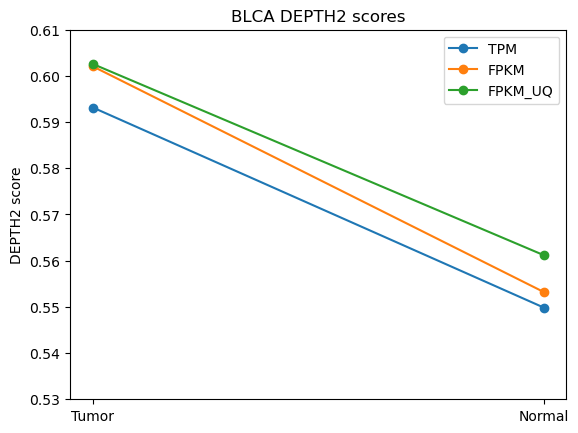

In [158]:
import matplotlib.pyplot as plt

# Data
x = [blca_tpm_tumor_depths.median(), blca_fpkm_tumor_depths.median(), blca_fpkm_uq_tumor_depths.median()]
y = [blca_tpm_normal_depths.median(), blca_fpkm_normal_depths.median(), blca_fpkm_uq_normal_depths.median()]

# Plotting
fig, ax = plt.subplots()

ax.plot([x[0], y[0]], '-o', label='TPM')
ax.plot([x[1], y[1]], '-o', label='FPKM')
ax.plot([x[2], y[2]], '-o', label='FPKM_UQ')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Tumor', 'Normal'])
ax.set_ylim(0.53, 0.61)
ax.set_ylabel('DEPTH2 score')
ax.set_title('BLCA DEPTH2 scores')
ax.legend()
plt.show()

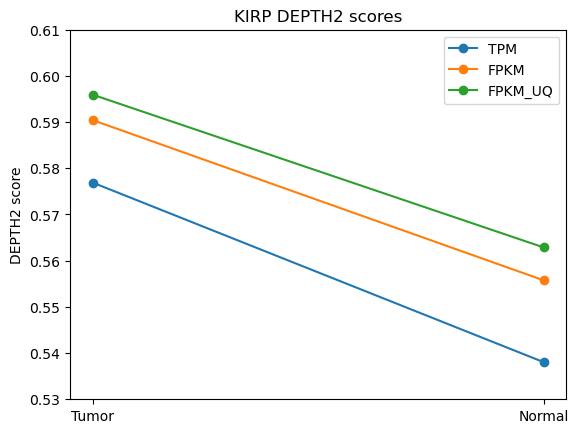

In [159]:
import matplotlib.pyplot as plt

# Data
x = [kirp_tpm_tumor_depths.median(), kirp_fpkm_tumor_depths.median(), kirp_fpkm_uq_tumor_depths.median()]
y = [kirp_tpm_normal_depths.median(), kirp_fpkm_normal_depths.median(), kirp_fpkm_uq_normal_depths.median()]

# Plotting
fig, ax = plt.subplots()

ax.plot([x[0], y[0]], '-o', label='TPM')
ax.plot([x[1], y[1]], '-o', label='FPKM')
ax.plot([x[2], y[2]], '-o', label='FPKM_UQ')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Tumor', 'Normal'])
ax.set_ylim(0.53, 0.61)
ax.set_ylabel('DEPTH2 score')
ax.set_title('KIRP DEPTH2 scores')
ax.legend()
plt.show()

In [31]:
import json
import pandas as pd

def TCGA_GeneExpression(metacart,gdcfolder):
    #takes in metacart & gdc folder containing after downloading cart from TCGA website
    #returns dataframe of gene expression values and patient ids
    f = open(metacart)
    data = json.load(f)
    df = None
    for patient in data:
        gene_exp_file = patient['file_id']+"/"+patient['file_name']
        patient_id = patient['associated_entities'][0]['entity_submitter_id']
        dt = pd.read_csv(gdcfolder+gene_exp_file, sep='\t',skiprows=[0])
        dt = dt[(dt['gene_type'] == 'protein_coding')] 
        if df is None:
            df = dt[["gene_name"]]
        dt = dt[["fpkm_uq_unstranded"]]
        dt.columns = [patient_id]
        df = df.join(dt)
    df = df.set_index("gene_name")
    return df
df = TCGA_GeneExpression("./metadata.cart.2023-04-13.json","./gdc_download_20230413_230751.424936/")
genes = df.index.values
df = depth2(df).to_frame().T
df.to_csv('test.csv', index = False)
df

,TCGA-OR-A5K0-01A-11R-A29S-07,TCGA-OR-A5L6-01A-11R-A29S-07,TCGA-OR-A5LT-01A-11R-A29S-07,TCGA-OR-A5JZ-01A-11R-A29S-07,TCGA-OR-A5JK-01A-11R-A29S-07,TCGA-OR-A5JT-01A-11R-A29S-07
0,0.59041,0.513655,0.532037,0.489822,0.582022,0.468522


In [59]:
def GDSC_CellLine(file,genes):
    #input a file from GDSC gene expression values for a cell line and a set of genes to filter out
    #output is dataframe of Symbol,tpm,fpkm values
    df = pd.read_csv(file)
    df = df[df['symbol'].isin(genes)]
    df = df[['symbol','tpm','fpkm']]
    return df

df = GDSC_CellLine('./sw13.csv',genes)
df

,symbol,tpm,fpkm
0,ABCC8,0.54,0.15
1,ABCC9,6.61,1.82
2,ABCC10,8.94,2.46
3,ABCC11,2.83,0.78
4,ABCD1,4.76,1.31
...,...,...,...
37182,TCP10L2,0.00,0.00
37185,TPSD1,0.00,0.00
37186,TPSG1,0.00,0.00
37204,TUBB8,0.54,0.15


In [61]:
def GDSC_IC50(file):
    #input is a file from GDSC that includes cell line name & IC50 values
    #returns dataframe with only those two pieces of information
    df = pd.read_csv(file)
    df = df[['Cell line','IC50']]
    return df

df = GDSC_IC50("./export.csv")
print(df)

     Cell line        IC50
0           DB    0.242220
1      CRO-AP2    0.265307
2       DOHH-2    0.271546
3       SUP-B8    0.331681
4     KASUMI-1    0.391456
..         ...         ...
954    SK-LU-1  117.537604
955     EFO-21  138.870369
956   COLO-678  173.379605
957     SU8686  180.041523
958  NCI-H1793  218.612959

[959 rows x 2 columns]


In [ ]:
df.to_csv(index=False)